In [7]:
import pandas as pd
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sys

%matplotlib inline
plt.style.use("ggplot")


# settings
data_root = '/home/jma/Python3.7/Cubist_2021_11'

dtcol = 'data_date'
seccol = 'security_id'
numericcols = ['rf1', 'rf2', 'rf3', 'rf4', 'rf5', 'rf6']

In [8]:
with zipfile.ZipFile(os.path.join(data_root, 'risk_factors.zip')) as zf:
    df = pd.read_csv(zf.open('risk_factors.csv'), parse_dates=[dtcol], 
                     dtype={seccol: str, 'rf1': np.float64, 'rf2': np.float64, 'rf3': np.float64, 
                            'rf4': np.float64, 'rf5': np.float64, 'rf6': np.float64})

In [9]:
assert not df.duplicated(subset=[dtcol, seccol]).any()
print(df.dtypes)
df[numericcols] = df[numericcols].apply(lambda x: pd.to_numeric(x, errors='coerce'))
print(df.dtypes)

data_date      datetime64[ns]
security_id            object
rf1                   float64
rf2                   float64
rf3                   float64
rf4                   float64
rf5                   float64
rf6                   float64
dtype: object
data_date      datetime64[ns]
security_id            object
rf1                   float64
rf2                   float64
rf3                   float64
rf4                   float64
rf5                   float64
rf6                   float64
dtype: object


In [10]:
df[numericcols].describe()

rf1           rf2           rf3           rf4           rf5  \
count  8.800015e+06  8.800015e+06  8.800015e+06  8.800015e+06  8.800015e+06   
mean   6.147015e-02 -2.931115e-01  5.656053e-01  4.668955e-01 -1.298852e-02   
std    1.169314e+00  1.164809e+00  1.269999e+00  1.195186e+00  1.114912e+00   
min   -3.068000e+00 -3.169000e+00 -2.893000e+00 -2.818000e+00 -2.976000e+00   
25%   -7.240000e-01 -9.020000e-01 -4.610000e-01 -4.050000e-01 -6.930000e-01   
50%    5.700000e-02 -2.060000e-01  2.640000e-01  2.810000e-01 -6.100000e-02   
75%    8.380000e-01  3.730000e-01  1.588000e+00  1.216000e+00  5.980000e-01   
max    3.700000e+00  2.946000e+00  3.034000e+00  3.278000e+00  2.976000e+00   

                rf6  
count  8.800015e+06  
mean  -5.038069e-01  
std    1.285264e+00  
min   -3.394000e+00  
25%   -1.138000e+00  
50%   -2.450000e-01  
75%    2.620000e-01  
max    2.794000e+00

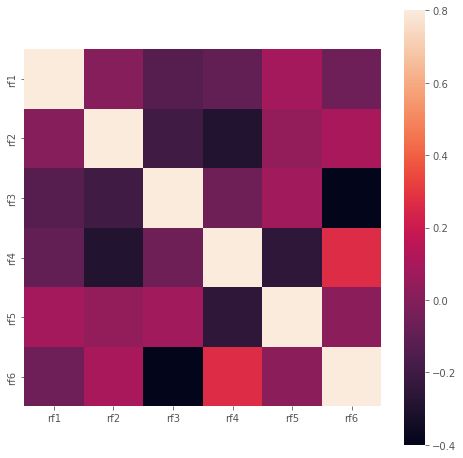

In [11]:
corrmat = df[numericcols].corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=0.8, square=True)
plt.show()

In [12]:
corrmat.round(2)

rf1   rf2   rf3   rf4   rf5   rf6
rf1  1.00  0.00 -0.13 -0.10  0.09 -0.06
rf2  0.00  1.00 -0.19 -0.29  0.04  0.10
rf3 -0.13 -0.19  1.00 -0.06  0.08 -0.40
rf4 -0.10 -0.29 -0.06  1.00 -0.25  0.27
rf5  0.09  0.04  0.08 -0.25  1.00  0.02
rf6 -0.06  0.10 -0.40  0.27  0.02  1.00

In [13]:
df.isnull().sum()

data_date      0
security_id    0
rf1            0
rf2            0
rf3            0
rf4            0
rf5            0
rf6            0
dtype: int64

<AxesSubplot:xlabel='data_date'>

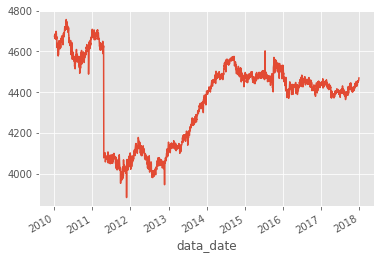

In [14]:
df.groupby(dtcol).size().plot()

In [24]:
rsch_universe = pd.read_csv(os.path.join(data_root, 'rsch_universe.csv.gz'), usecols=[dtcol, seccol], parse_dates=[dtcol],
                           dtype={seccol: str})

<AxesSubplot:xlabel='data_date'>

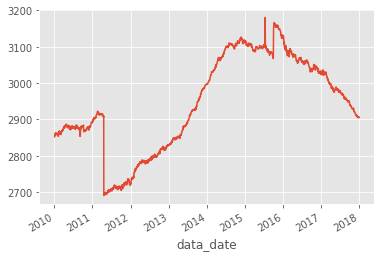

In [25]:
rsch_universe.groupby(dtcol).size().plot()

In [26]:
rsch_universe.head()

data_date security_id
0 2010-01-04     1000201
1 2010-01-04     1004601
2 2010-01-04      100701
3 2010-01-04     1007201
4 2010-01-04     1009601

In [27]:
df = df.merge(rsch_universe)

<AxesSubplot:xlabel='data_date'>

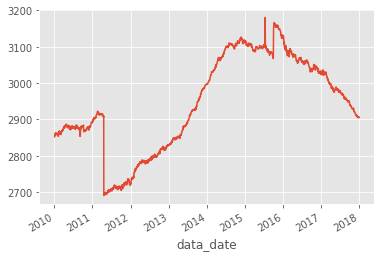

In [28]:
df.groupby(dtcol).size().plot()

In [30]:
print(df.head())
print(df.tail())

   data_date security_id    rf1    rf2    rf3    rf4    rf5    rf6
0 2010-01-04     3780701  1.890 -1.330 -0.208  0.775 -0.803 -0.576
1 2010-01-04     2297301  0.012  0.217  0.285 -0.151  0.883  0.127
2 2010-01-04       83501  1.185  1.195  2.677 -1.485 -1.236 -1.341
3 2010-01-04     4159901 -0.335 -2.917  2.548  1.691  0.394 -2.290
4 2010-01-04     2787001  1.078 -0.634  1.273  1.000  2.514  0.796
         data_date security_id    rf1    rf2    rf3    rf4    rf5    rf6
5927170 2017-12-29  1117291901  1.836  2.533  2.553 -0.673  2.651  0.717
5927171 2017-12-29  1117267401 -1.199 -1.605  0.692  1.286  0.429 -0.372
5927172 2017-12-29  1117382401 -1.463 -2.801  2.051 -0.400 -1.305 -1.378
5927173 2017-12-29  1117402901 -0.744 -1.197 -1.383  2.238 -0.155  1.004
5927174 2017-12-29  1101172401 -0.348 -1.230 -0.262  1.894 -0.067 -0.848


In [31]:
df.to_csv(os.path.join(data_root, 'risk_factor.csv.gz'), index=False, compression='gzip')

array([<AxesSubplot:xlabel='data_date'>, <AxesSubplot:xlabel='data_date'>,
       <AxesSubplot:xlabel='data_date'>, <AxesSubplot:xlabel='data_date'>,
       <AxesSubplot:xlabel='data_date'>, <AxesSubplot:xlabel='data_date'>],
      dtype=object)

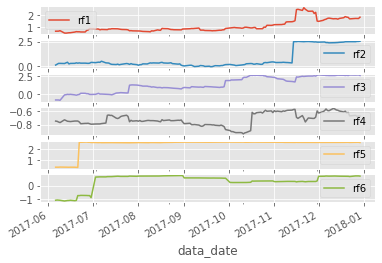

In [32]:
df.loc[df[seccol] == '1117291901'].set_index(dtcol).plot(subplots=True)